# IDEA

### People prefer to ride bike for short distance, which is less than 15 minutes**

# Null hypothesis 
### The ratio of trips less or equal to 15 minutes is the same or less than the ratio of trips more than 15 minutes.
### H0: Tlong >= Tshort

# Alternative hypothesis 
### The ratio of trips less or equal to 15 minutes is more than the ratio of trips more than 15 minutes.
### H0: Tlong < Tshort

### The significance threshold is 5%


In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import sys
import os

%pylab inline

os.getenv('PUIDATA')


Populating the interactive namespace from numpy and matplotlib


'/home/cusp/yw3447/PUIdata'

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201612'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['Start Time'])

df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1,2016-12-01 00:00:04
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1,2016-12-01 00:00:28
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1,2016-12-01 00:00:39
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1,2016-12-01 00:00:44
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1,2016-12-01 00:00:54


In [5]:
df.keys()

Index([u'Trip Duration', u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender', u'date'],
      dtype='object')

In [6]:
df.drop([u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender'], axis=1,inplace=True)

In [7]:
df.head()

,Trip Duration,date
0,528,2016-12-01 00:00:04
1,218,2016-12-01 00:00:28
2,399,2016-12-01 00:00:39
3,254,2016-12-01 00:00:44
4,1805,2016-12-01 00:00:54


# Lets separate trips more than 15 minutes (Long trip) from trips equal or less than 15 trips (Short trip) to test the hypotheses.
# In this csv file Trip Duration > 900 is long trip, Trip Duration <= 900 is short trip
# Lets plot the number of trips per week day

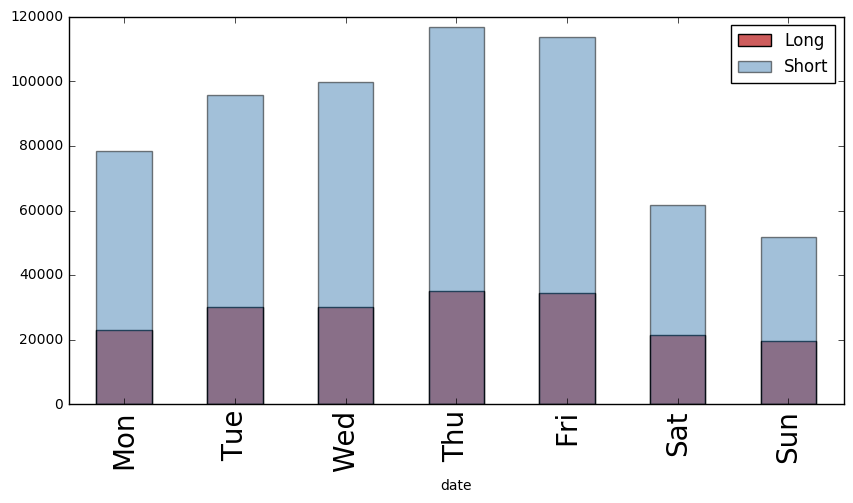

In [8]:
fig = pl.figure(figsize(10,5))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_long = 1
ax = ((df['date'][df['Trip Duration'] > 900].groupby([df['date'].dt.weekday]).count()) / norm_long).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Long')

norm_short = 1
ax = ((df['date'][df['Trip Duration'] <= 900].groupby([df['date'].dt.weekday]).count()) / norm_short).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Short')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

### Figure 1a: Distribution of Citibike bikers by ride time in December 2016, absolute counts

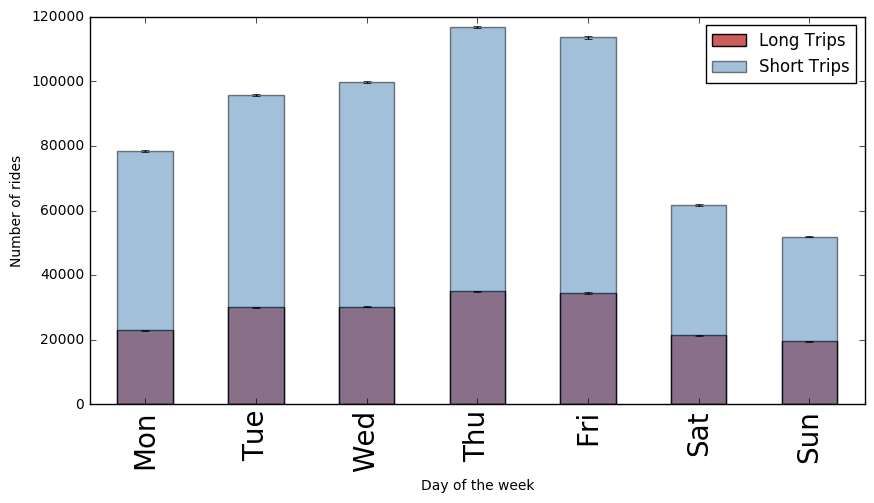

In [9]:
fig=pl.figure(figsize(10,5))

counts_long = df.date[df['Trip Duration'] > 900].groupby([df.date.dt.weekday]).count()
norm_long = 1
error_long = np.sqrt(counts_long)
ax=((counts_long) / norm_long).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_long) / norm_long, (error_long) / norm_long)], label='Long Trips')


counts_short = df.date[df['Trip Duration'] <= 900].groupby([df.date.dt.weekday]).count()
norm_short = 1
error_short =np.sqrt(counts_short)
ax = ((counts_short) / norm_short).plot(kind="bar", color='SteelBlue', alpha=0.5, yerr=[
            ((error_short) / norm_short, (error_short) / norm_short)], label='Short Trips')

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend()

### Figure 1b: Distribution of Citibike bikers by ride time in December 2016, absolute counts, with statistical errors

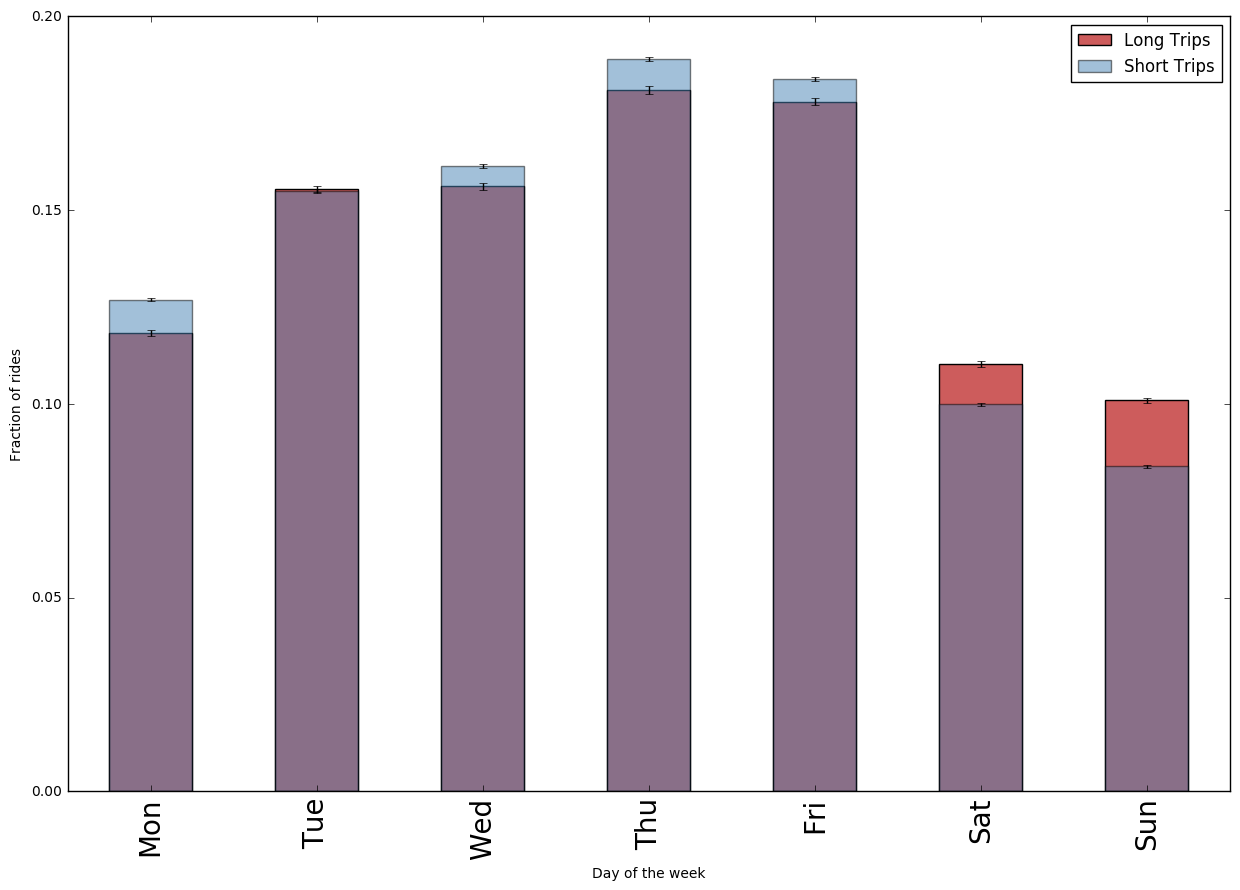

In [10]:
fig = pl.figure(figsize(15,10))

norm_long = counts_long.sum()
error_long = np.sqrt(counts_long)
ax = ((counts_long) / norm_long).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_long) / norm_long, (error_long) / norm_long)], 
                           label='Long Trips')

norm_short = counts_short.sum()
ax = ((counts_short) / norm_short).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_short) / norm_short, (error_short) / norm_short)], 
                                color='SteelBlue', label='Short Trips')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend()

### Figure 2: Distribution of Citibike bikers by ride time in December 2016, normalized